In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

In [ ]:
url = "https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv"
df = pd.read_csv(url)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

CreditScore                      int64
Age                              int64
Tenure                           int64
Balance                        float64
NumOfProducts                    int64
HasCrCard                        int64
IsActiveMember                   int64
EstimatedSalary                float64
Exited                           int64
EstimatedSalary_Normalized     float64
Balance_Normalized             float64
Age_Category                  category
CreditScore_Category          category
dtype: object

In [ ]:
#Turn the objects found in dtype as strings
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")
df.dtypes

RowNumber                   int64
CustomerId                  int64
Surname            string[python]
CreditScore                 int64
Geography          string[python]
Gender             string[python]
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                   int64
IsActiveMember              int64
EstimatedSalary           float64
Exited                      int64
dtype: object

In [ ]:
#Dropping the rows that are not needed
df = df.drop(columns = ['RowNumber','CustomerId','Surname', 'Geography', 'Gender'])

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


**Attributes that will be used**

CreditScore: The credit score of the customer.

Geography: The geographical location of the customer (e.g., country or region).

Gender: The gender of the customer.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of bank products the customer has.

HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).

IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).

EstimatedSalary: The estimated salary of the customer.

Exited: Indicates whether the customer has exited the bank (binary: yes/no).

No Null values so we dont have to do anything

In [ ]:
#Creating a corellation matric with only the numeric values
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
px.imshow(numeric_cols.corr(),title="Correlation Plot of costumers leaving the bank")

From This we can see that age and balance are the once with more importance to the outcome based on this matrix.


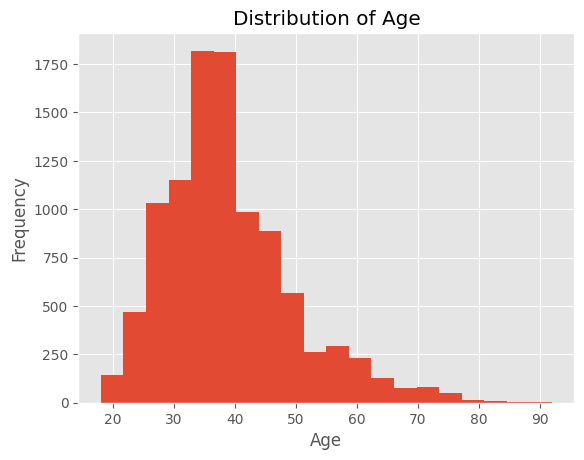

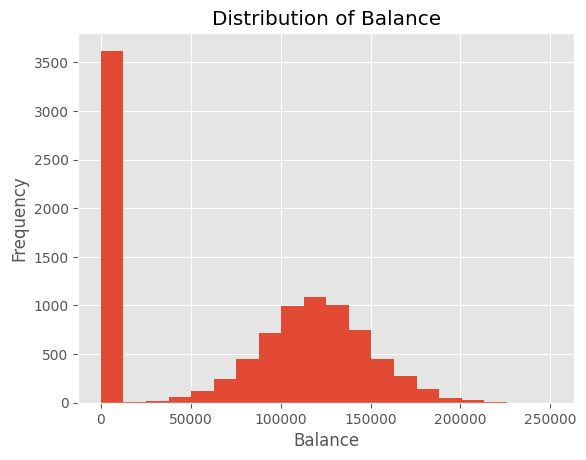

In [ ]:
#Since age and balance seem to be one of the most important we are going to explore those a little further

df['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

df['Balance'].hist(bins=20)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

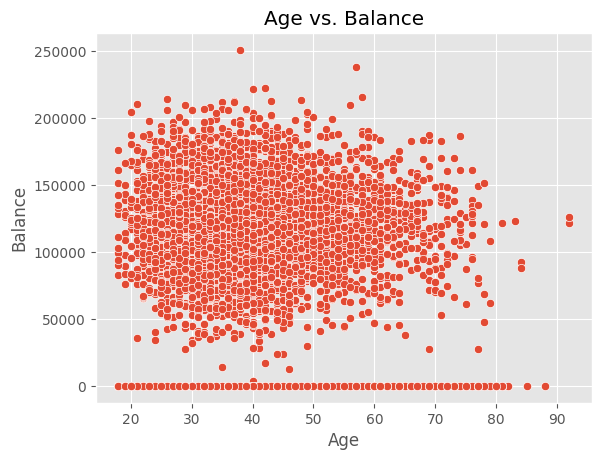

In [ ]:
#Compare them together so we can see how theyu affect one another
sns.scatterplot(x='Age', y='Balance', data=df)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs. Balance')
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

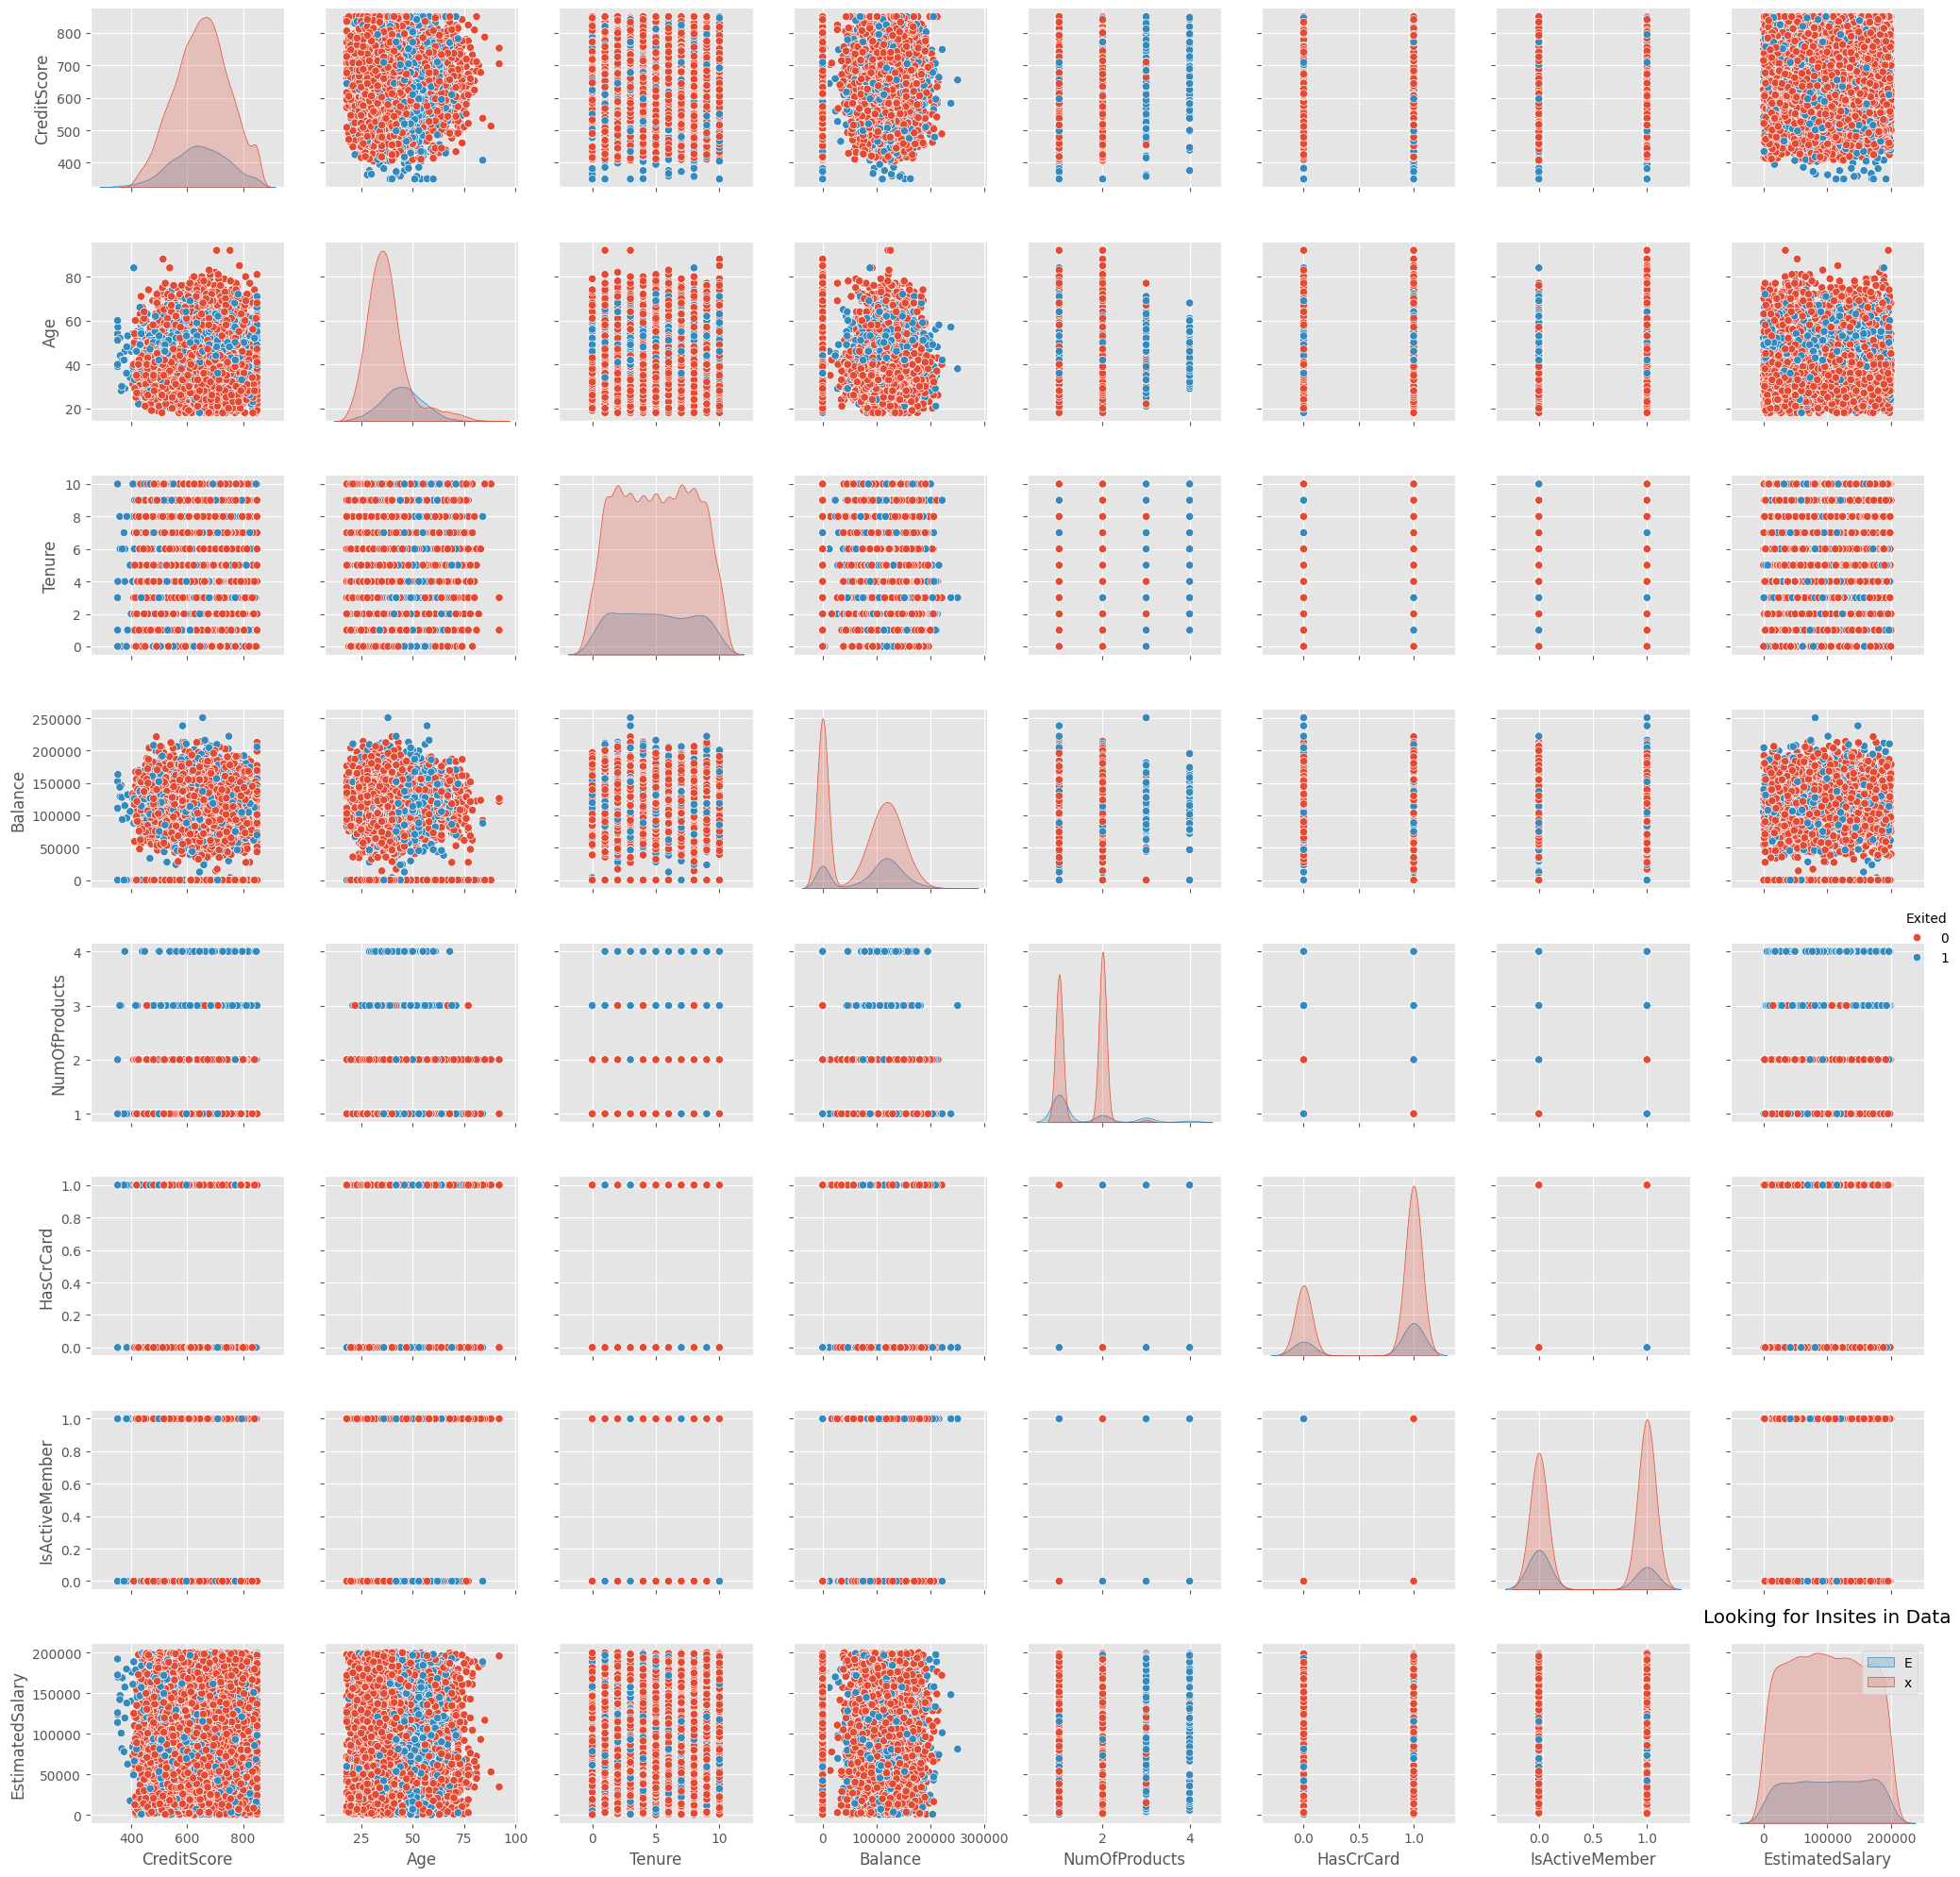

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Exited")
plt.title("Looking for Insites in Data")
plt.legend("Exited")
plt.tight_layout()
plt.plot()

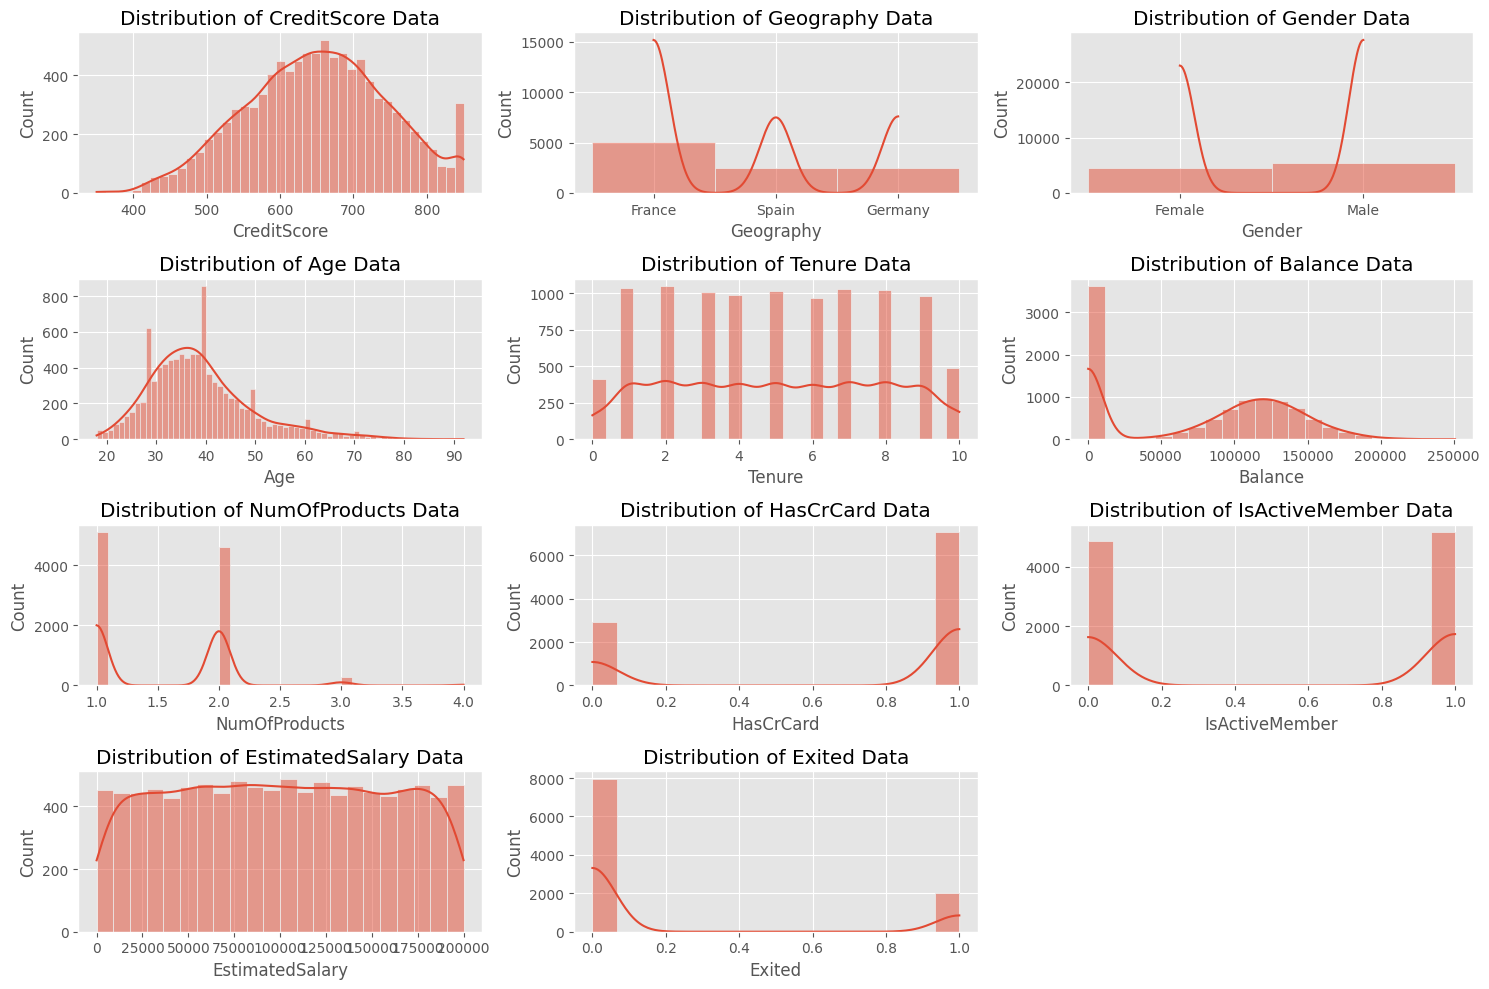

In [ ]:
#Check distribution of data checking for ouliers
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

From this we can see what we can investigate further, which would be age, balance, credit score and estimated salary

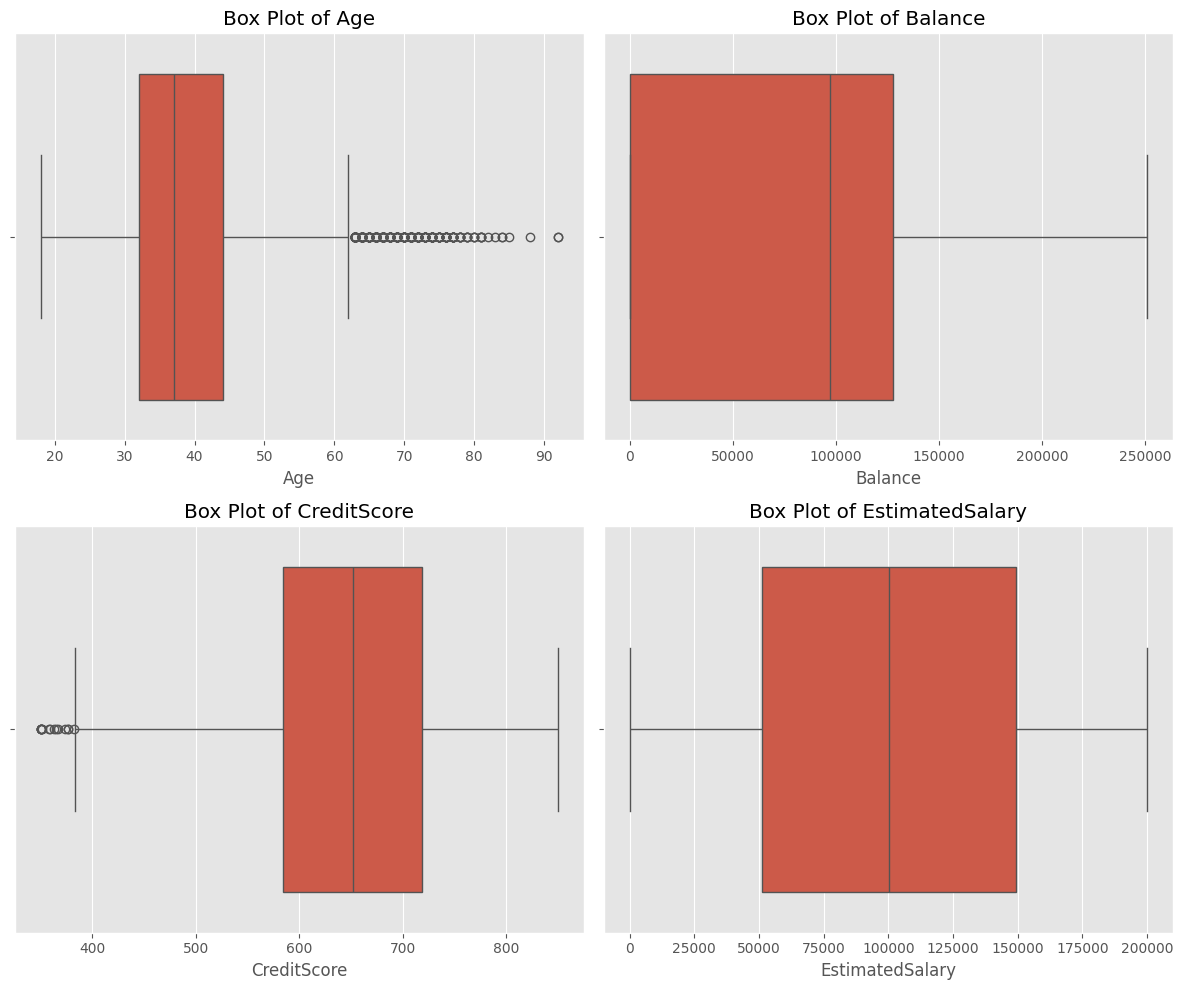

In [ ]:
columns_of_interest = ['Age', 'Balance', 'CreditScore', 'EstimatedSalary']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(columns_of_interest):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


From this we can see that we could remove couple of ouliers from age and credit score

In [ ]:
#Using z score to remove any outliers from Age and Credit score
z_scores = zscore(df['Age'])
df_no_outliers_Age = df[(z_scores < 3) & (z_scores > -3)]

z_scores = zscore(df['CreditScore'])
df_no_outliers_Credit = df[(z_scores < 3) & (z_scores > -3)]

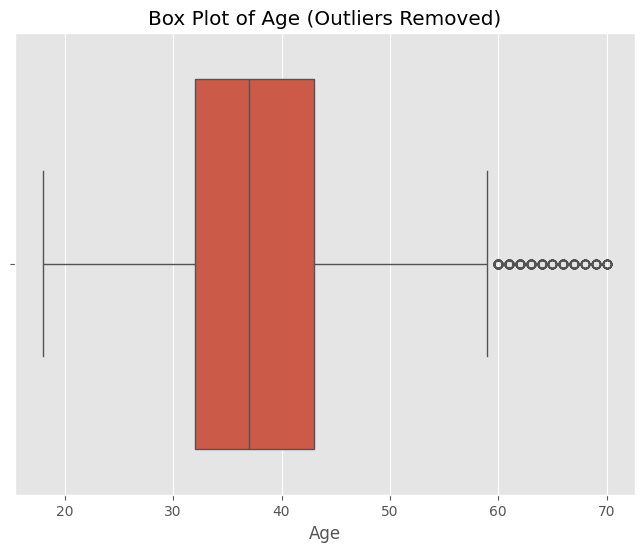

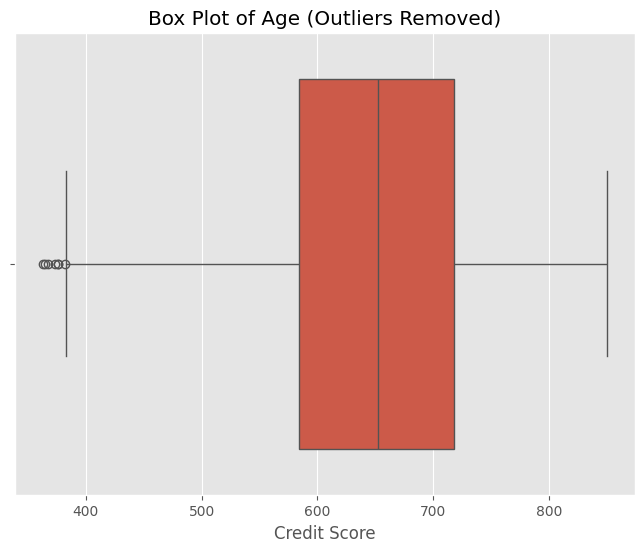

In [ ]:
#Running the box plots again to see difference
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers_Age['Age'])
plt.title('Box Plot of Age (Outliers Removed)')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers_Credit['CreditScore'])
plt.title('Box Plot of Age (Outliers Removed)')
plt.xlabel('Credit Score')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RowNumber                   10000 non-null  int64  
 1   CustomerId                  10000 non-null  int64  
 2   Surname                     10000 non-null  string 
 3   CreditScore                 10000 non-null  int64  
 4   Geography                   10000 non-null  string 
 5   Gender                      10000 non-null  string 
 6   Age                         10000 non-null  int64  
 7   Tenure                      10000 non-null  int64  
 8   Balance                     10000 non-null  float64
 9   NumOfProducts               10000 non-null  int64  
 10  HasCrCard                   10000 non-null  int64  
 11  IsActiveMember              10000 non-null  int64  
 12  EstimatedSalary             10000 non-null  float64
 13  Exited                      1000

In [ ]:
missing_values_after = df.isnull().sum()
print(missing_values_after)

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#Putting labels in data, putting data in bins
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

credit_score_bins = [0, 500, 600, 700, 800, 900]
credit_score_labels = ['<500', '500-600', '600-700', '700-800', '800-900']
df['CreditScore_Category'] = pd.cut(df['CreditScore'], bins=credit_score_bins, labels=credit_score_labels)

In [ ]:
print(df[['Age', 'Age_Category', 'CreditScore', 'CreditScore_Category']].head())

   Age Age_Category  CreditScore CreditScore_Category
0   42        40-50          619              600-700
1   41        40-50          608              600-700
2   42        40-50          502              500-600
3   39        30-40          699              600-700
4   43        40-50          850              800-900


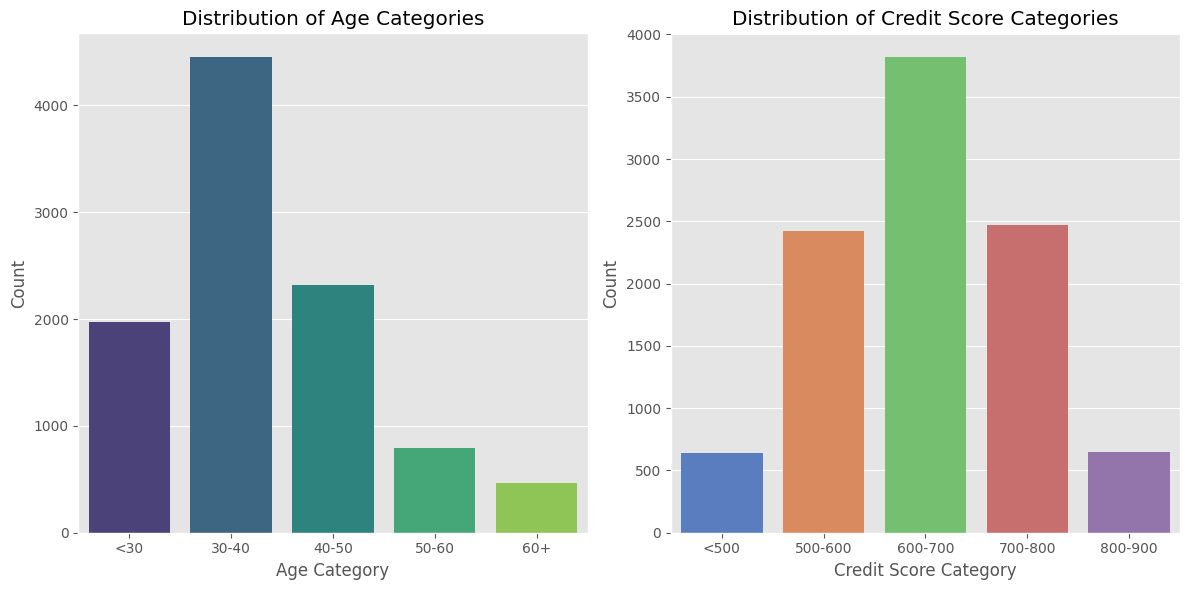

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram for Age_Category
sns.countplot(x='Age_Category', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Age Categories')
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Count')

# Plot histogram for CreditScore_Category
sns.countplot(x='CreditScore_Category', data=df, ax=axes[1], palette='muted')
axes[1].set_title('Distribution of Credit Score Categories')
axes[1].set_xlabel('Credit Score Category')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#Normalizing values EstimatedSalary and balance, so they do not span on a wide range
#important for balance because it has a lot of 0 values
scaler = MinMaxScaler()
df['EstimatedSalary_Normalized'] = scaler.fit_transform(df[['EstimatedSalary']])
df['Balance_Normalized'] = scaler.fit_transform(df[['Balance']])
#df.head()

In [ ]:
#Preparing and splitting the data
df_encoded = pd.get_dummies(df, columns=['Age_Category', 'CreditScore_Category', 'Balance_Normalized', 'EstimatedSalary_Normalized'])
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Tree Based Classification**

In [ ]:
#Training with Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.84      0.31      0.45       393

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



In [ ]:
#Training with Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.84      0.31      0.45       393

    accuracy                           0.85      2000
   macro avg       0.84      0.65      0.68      2000
weighted avg       0.85      0.85      0.82      2000



**Non tree Based classification**

In [ ]:
#Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



In [ ]:
#SVM
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)
tree = rf_classifier.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=['0', '1'])
plt.title("Decision Tree from Random Forest", fontsize=16)
plt.show()